### Created by: Anthony D. Cho
### Last update: 13.10.2021

**Subject**: Classification (Logistic, SVM) - Applied to Letter Recognition


## Libraries dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact#, interact_manual

from time import time
import matplotlib.pyplot as plt
from pandas import read_csv, get_dummies

## Pre-processing functions
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from numpy import linspace

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

## Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

%matplotlib inline

# Problem: Letter Recognition

## Data loading

Source: [Letter Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition) (UCI Repository)

In [2]:
## Load data
data = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data',
                header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
data.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8


#### The target (letter) is on column 0

## Data pre-processing

In [5]:
## Encode: column 0 (letters) supposing in ordinal way (0: A, 1: B, ..., 25: Z)
encoder = LabelEncoder().fit(data.iloc[:, 0])
data.iloc[:, 0] = encoder.transform(data.iloc[:, 0])

In [6]:
## Predictors and target (first column: letter)
X, y = data.iloc[:, 1:], data.iloc[:, 0]

## Data partition (hold-out validation)
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, train_size=0.85, random_state=0)

## Data standardization (this function return a numpy.ndarray)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print('(train shape) X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('(Validation shape) X: {}, y: {}'.format(X_val.shape, y_val.shape))
print('(test shape) X: {}, y: {}'.format(X_test.shape, y_test.shape))

(train shape) X: (14450, 16), y: (14450,)
(Validation shape) X: (2550, 16), y: (2550,)
(test shape) X: (3000, 16), y: (3000,)


## Model: Linear SVM / Logistic regression

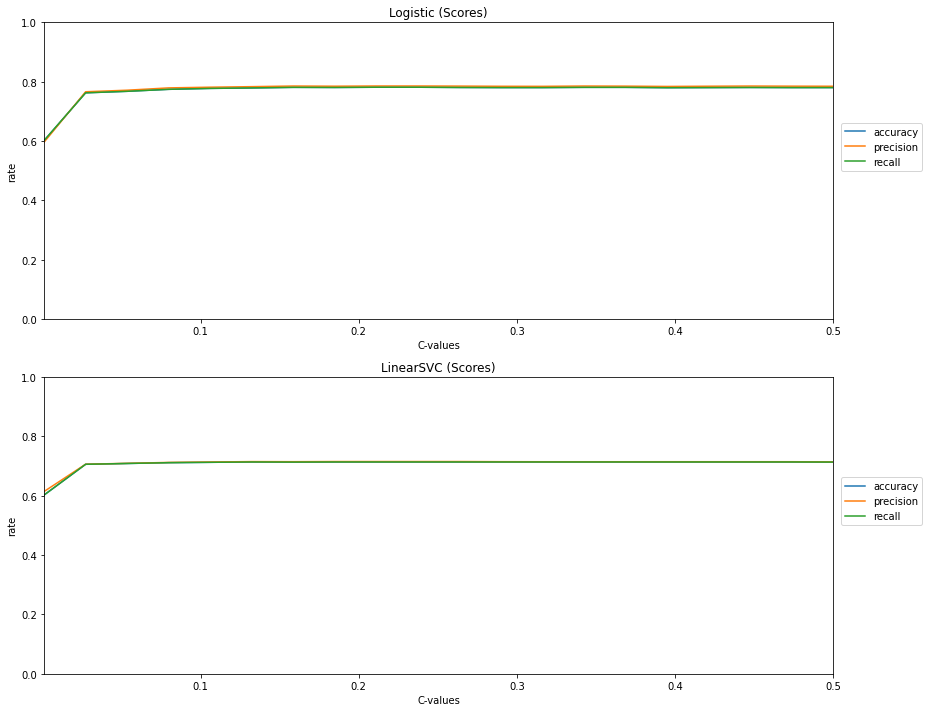

Time spent[s]: 158.23


In [7]:
start = time()

## Set of regularization values 
C = linspace(0.001, 0.5, 20)

## Scores storage
metrics = {'Logistic': {'accuracy':[], 'precision': [], 'recall': []},
           'LinearSVC': {'accuracy':[], 'precision': [], 'recall': []}
           }

## Run over all values of C.
for c in C:
    
    ## Models instance
    methods = {'Logistic': LogisticRegression(n_jobs=-1, C=c), 
               'LinearSVC': LinearSVC(C=c)}
    
    ## Fit and compte scores using validation dataset
    for m in methods:
        
        ## Model fitting
        methods[m].fit(X_train, y_train)
        
        ## Compute prediction using validation data
        prediction = methods[m].predict(X_val)
        
        ## Compute scores
        metrics[m]['accuracy'].append( accuracy_score(y_true=y_val, y_pred=prediction) )
        metrics[m]['precision'].append( precision_score(y_true=y_val, y_pred=prediction, average='weighted') )
        metrics[m]['recall'].append( recall_score(y_true=y_val, y_pred=prediction, average='weighted') )

## Plot C-values vs scores
i = 1
plt.figure(figsize=(13, 10))

for method in metrics.keys():
    plt.subplot(2,1,i)
    
    for metric in metrics[method].keys():
        
        # Display scores
        plt.plot(C, metrics[method][metric], label=metric) 
        
    plt.title('{} (Scores)'.format(method))
    plt.xlabel('C-values')
    plt.ylabel('rate')
    plt.legend(loc=(1.01, 0.5))
    plt.xlim(C[0], C[-1])
    plt.ylim(0,1)
    i += 1
plt.tight_layout()
plt.show()

stop = time()
print('Time spent[s]: {:.2f}'.format(stop -start))

## Best model: Logistic regression

In [9]:
## Predictors and target (first column: letter)
X, y = data.iloc[:, 1:], data.iloc[:, 0]

## Data partition (hold-out validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

## Data standardization (this function return a numpy.ndarray)
scaler = StandardScaler().fit(X_train)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
c = 0.05

In [11]:
## Build, fit and predict
model = LogisticRegression(n_jobs=-1, C=c)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy  (test): {:.4f}'.format( accuracy_score(y_true=y_test, y_pred=prediction) ))
print('Precision (test): {:.4f}'.format( precision_score(y_true=y_test, y_pred=prediction, average='weighted') ))
print('Recall    (test): {:.4f}'.format( recall_score(y_true=y_test, y_pred=prediction, average='weighted') ))

Accuracy  (test): 0.7697
Precision (test): 0.7712
Recall    (test): 0.7697


In [13]:
print(classification_report(y_true=y_test, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.67      0.65      0.66       113
           2       0.79      0.75      0.77       130
           3       0.73      0.81      0.77       128
           4       0.71      0.78      0.74       106
           5       0.82      0.78      0.80       121
           6       0.72      0.51      0.59       144
           7       0.57      0.44      0.50        95
           8       0.92      0.82      0.87        88
           9       0.92      0.85      0.88       110
          10       0.66      0.74      0.70       103
          11       0.90      0.84      0.87       122
          12       0.86      0.89      0.87       141
          13       0.83      0.86      0.84       110
          14       0.71      0.65      0.68       105
          15       0.89      0.80      0.84       124
          16       0.64      0.84      0.73       108
          17       0.60    

## Best model: Linear SVM

In [14]:
## Build, fit and predict
model = LinearSVC(C=c)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print('Accuracy  (test): {:.4f}'.format( accuracy_score(y_true=y_test, y_pred=prediction) ))
print('Precision (test): {:.4f}'.format( precision_score(y_true=y_test, y_pred=prediction, average='weighted') ))
print('Recall    (test): {:.4f}'.format( recall_score(y_true=y_test, y_pred=prediction, average='weighted') ))

Accuracy  (test): 0.6967
Precision (test): 0.6990
Recall    (test): 0.6967


In [15]:
print(classification_report(y_true=y_test, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.57      0.61      0.59       113
           2       0.66      0.78      0.72       130
           3       0.72      0.80      0.76       128
           4       0.67      0.55      0.60       106
           5       0.82      0.63      0.71       121
           6       0.71      0.20      0.31       144
           7       0.32      0.23      0.27        95
           8       0.80      0.81      0.80        88
           9       0.82      0.81      0.81       110
          10       0.62      0.56      0.59       103
          11       0.80      0.82      0.81       122
          12       0.81      0.89      0.85       141
          13       0.67      0.78      0.72       110
          14       0.72      0.34      0.46       105
          15       0.74      0.81      0.77       124
          16       0.52      0.81      0.64       108
          17       0.51    